# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [3]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

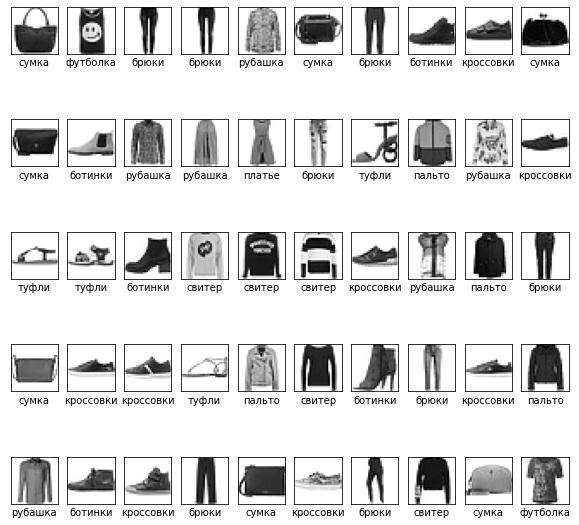

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [6]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 
x_test = x_test / 255 

**Работа с правильными ответами**

In [7]:
n = 1

In [8]:
print(y_train[n])

0


**Преобразуем метки в формат one hot encoding**

In [9]:
y_train = utils.to_categorical(y_train, 10)

In [10]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [11]:
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [133]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [134]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 800)               628000    
                                                                 
 dense_15 (Dense)            (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [135]:
history = model.fit(x_train, y_train, 
                    batch_size=3500, 
                    epochs=30,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/30
14/14 [==============================] - 3s 170ms/step - loss: 1.0734 - accuracy: 0.6372 - val_loss: 0.6366 - val_accuracy: 0.7773
Epoch 2/30
14/14 [==============================] - 2s 137ms/step - loss: 0.5842 - accuracy: 0.8026 - val_loss: 0.5239 - val_accuracy: 0.8214
Epoch 3/30
14/14 [==============================] - 2s 140ms/step - loss: 0.5004 - accuracy: 0.8305 - val_loss: 0.4761 - val_accuracy: 0.8352
Epoch 4/30
14/14 [==============================] - 2s 137ms/step - loss: 0.4611 - accuracy: 0.8434 - val_loss: 0.4498 - val_accuracy: 0.8423
Epoch 5/30
14/14 [==============================] - 2s 150ms/step - loss: 0.4318 - accuracy: 0.8526 - val_loss: 0.4363 - val_accuracy: 0.8479
Epoch 6/30
14/14 [==============================] - 2s 161ms/step - loss: 0.4140 - accuracy: 0.8577 - val_loss: 0.4193 - val_accuracy: 0.8534
Epoch 7/30
14/14 [==============================] - 2s 142ms/step - loss: 0.3988 - accuracy: 0.8626 - val_loss: 0.4135 - val_accuracy: 0.8520
Epoch 

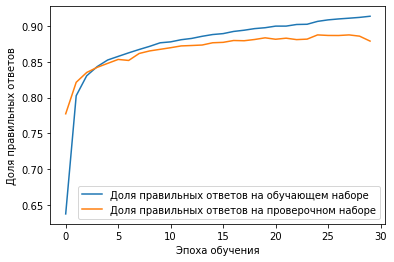

In [136]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

## Сохраняем нейронную сеть для последующего использования

In [137]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [138]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8701


In [139]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 87.01


## Используем сеть для распознавания предметов одежды

In [140]:
from random import randint;
n_rec = 497

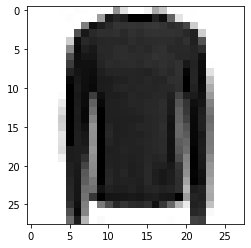

Номер класса: 2
Название класса: свитер
Верный ответ: свитер


In [151]:
n = randint(0, x_test.shape[0])
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])
print("Верный ответ:", classes[np.argmax(y_test[n])])



**Меняем размерность изображения и нормализуем его**

In [142]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [143]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [144]:
prediction

array([[3.2655819e-04, 1.0775089e-05, 9.9258971e-01, 2.5786938e-05,
        6.2004884e-04, 1.1480719e-10, 5.2604522e-03, 1.7119920e-11,
        1.1666361e-03, 4.7859942e-11]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [145]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 2
Название класса: свитер


**Печатаем правильный ответ**

In [146]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: свитер


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.
 

Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.